# Histogram Sample
アンケート結果の分析等によく用いられるヒストグラムについて、matplotlibと seaborn の２つのライブラリを用いた事例を紹介します。

## 可視化関連ライブラリの読み込み

In [ ]:
# グラフの日本語表示のために japanize-matplotlib をインストール
!pip install japanize-matplotlib

In [2]:
# データ分析支援モジュール（データフレームの利用）
import numpy as np
import pandas as pd

# 統計モジュールから正規分布モジュールを読み込み
from scipy.stats import norm

# グラフ描画の標準的なライブラリ
from matplotlib import pyplot as plt

# データ可視化ライブラリ（matplotlibが内部で動いている）
import seaborn as sns

# seabornの機能を有効化
sns.set()

# 日本語表示のためのライブラリ
import japanize_matplotlib



## データの読み込みと概要の確認

In [3]:
# 4学部 569名の成績ダミーデータ
df = pd.read_csv("https://raw.githubusercontent.com/koichi-inoue/DataScience/main/Dummy500.csv")
df

,学部,性別,GPA,出席率,国語,英語,数学,出身県
0,経済,男,1.355,0.58,64,7,35,長崎県
1,体育,男,3.261,0.96,62,63,30,福岡県
2,理工,男,2.324,0.98,54,56,80,福岡県
3,理工,女,3.231,0.95,70,85,88,長崎県
4,理工,男,2.615,0.96,70,79,44,山口県
...,...,...,...,...,...,...,...,...
564,経済,男,1.375,0.84,36,5,20,福岡県
565,理工,男,1.448,0.90,38,12,56,福岡県
566,体育,男,1.950,0.76,78,1,90,福岡県
567,理工,女,2.843,0.99,50,75,64,福岡県


In [4]:
# 統計量の要約表示
df.describe()

,GPA,出席率,国語,英語,数学
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.296445,0.852496,57.752197,48.495606,45.775044
std,0.777337,0.120802,12.936196,27.103032,25.037901
min,0.000000,0.300000,12.000000,0.000000,0.000000
25%,1.750000,0.790000,50.000000,26.000000,25.000000
50%,2.346000,0.890000,58.000000,47.000000,40.000000
75%,2.882000,0.940000,68.000000,73.000000,65.000000
max,3.870000,0.990000,90.000000,99.000000,100.000000


## ヒストグラム｜pyplot.hist

### シンプルなヒストグラム

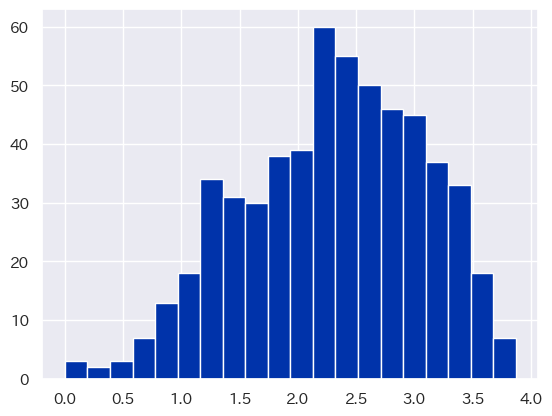

In [5]:
plt.hist( data = df , x = 'GPA' , bins = 20 , color='#0033AA')
plt.show()

* bins は x軸方向のデータ分割数

### 正規分布グラフの重ね合わせ

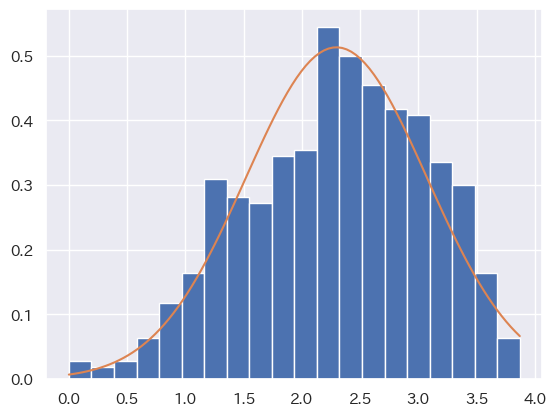

In [6]:
# ヒストグラムを描画
plt.hist( data = df, x = 'GPA', bins=20, density=True )

# コードの簡略化のため GPA の部分のみを取得
gpa = df['GPA']

# 平均と標準偏差、最小値と最大値を取得
mean , std = gpa.mean(), gpa.std()
xmin, xmax = gpa.min(), gpa.max()

# 曲線描画用に要素数を指定して等差数列を生成
ls = np.linspace(xmin, xmax, 100)

# 正規分布関数を生成
pdf = norm.pdf(x= ls, loc = mean, scale = std)

# 正規分布を描画
plt.plot(ls, pdf)

# 表示
plt.show()

* density = True にすることで、縦軸を各binに対応する個数ではなく確率密度に変更できます。分布関数のグラフを重ねるには、この指定が必要です。
* pdf：Probability Density Function



## ヒストグラム｜seaborn.histplot

### シンプルなヒストグラム

<Axes: xlabel='GPA', ylabel='Count'>

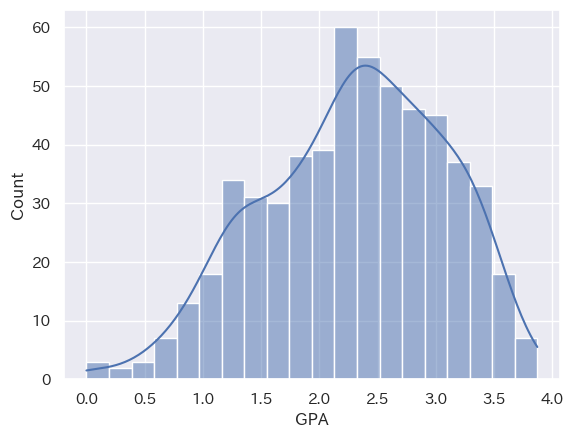

In [7]:
sns.histplot( data = df , x= 'GPA' , bins=20, kde=True )

* kde は カーネル密度関数グラフの併記

### ２つのヒストグラムを重ねて表示する

<Axes: xlabel='GPA', ylabel='Count'>

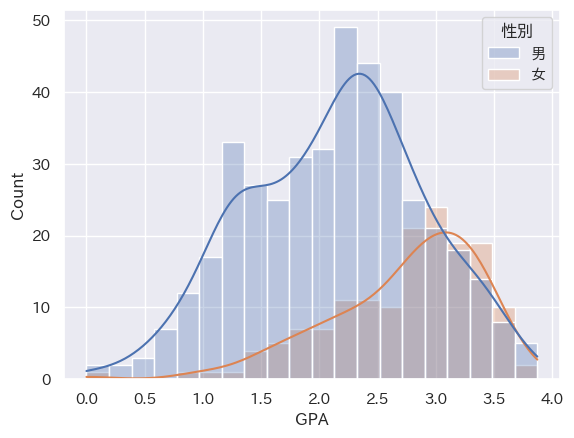

In [8]:
sns.histplot( data = df , x ='GPA' , bins = 20, hue ='性別', alpha = 0.3, kde = True )

### countplot を用いた「質的変数」の度数分布

<Axes: xlabel='学部', ylabel='count'>

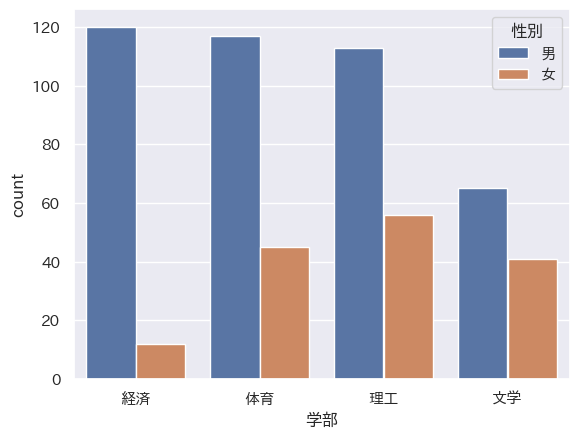

In [11]:
sns.countplot( data = df , x = '学部' , hue = '性別' )

### boxplot を用いた「箱ひげ図」

<Axes: xlabel='学部', ylabel='GPA'>

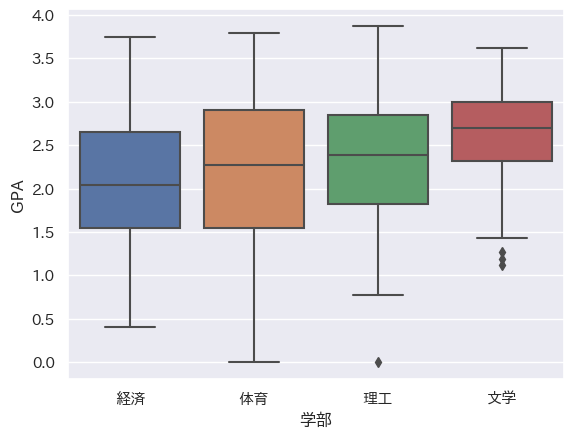

In [12]:
sns.boxplot( data = df , x = '学部' , y = 'GPA')